# 1 Generation of linearly-separable data

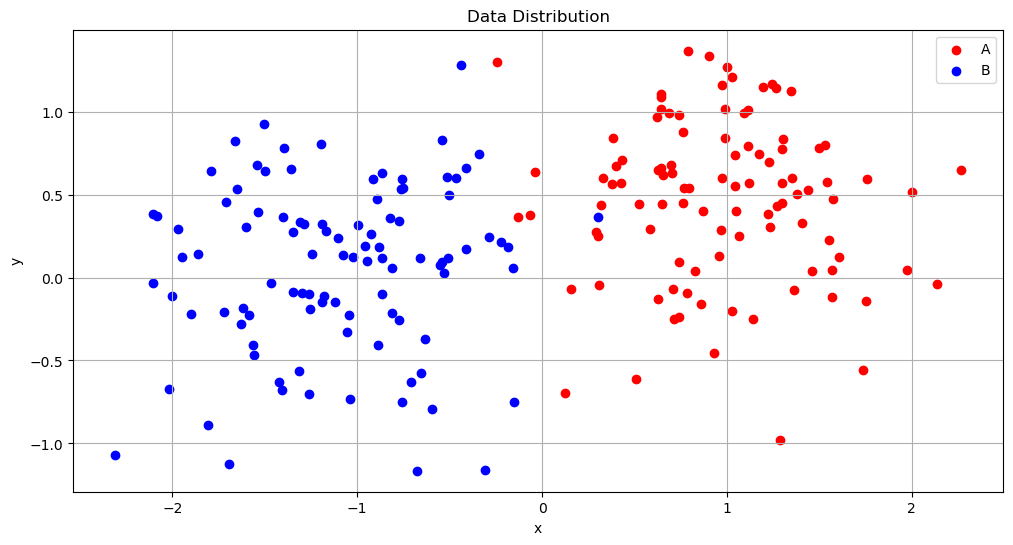

In [1]:
import numpy as np
import  matplotlib.pyplot as plt

#parameters
n = 100
mA = np.array([1.0, 0.5])
mB = np.array([-1.0, 0.0])
sigmaA = 0.5
sigmaB = 0.5

#generate data
ClassA = np.random.randn(2,n)*sigmaA + mA.reshape(2,1)  #2*n matrix
ClassB = np.random.randn(2,n)*sigmaB + mB.reshape(2,1)  #2*n matrix

#plot data
plt.figure(figsize=(12, 6))
plt.scatter(ClassA[0, :], ClassA[1, :], c='r', label='A')
plt.scatter(ClassB[0, :], ClassB[1, :], c='b', label='B')
plt.title("Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



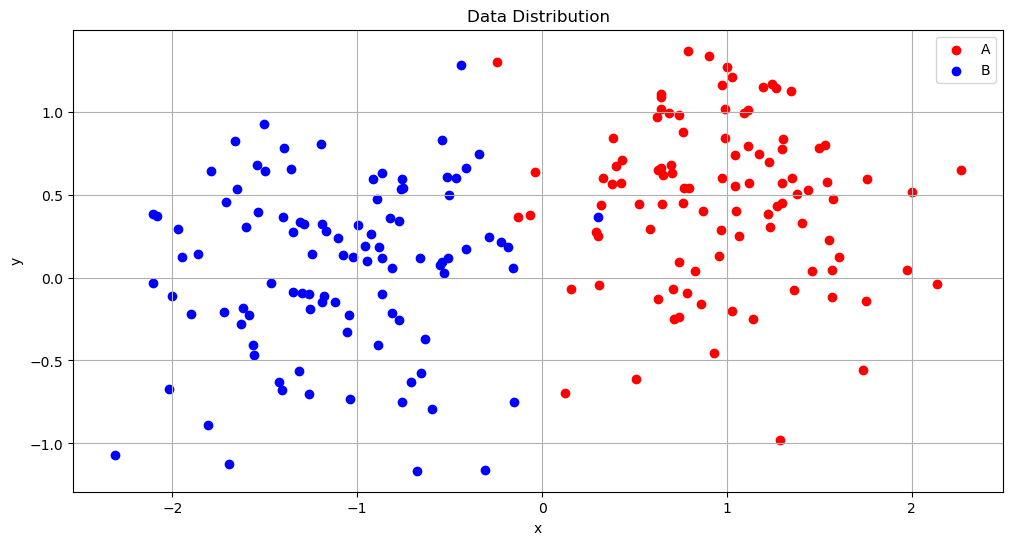

In [2]:
#shuffle 
#lest assume 1 for class A and -1 for B
labels = np.concatenate((np.ones(n), -np.ones(n))).reshape(1,2*n)
classtotal  = np.concatenate((ClassA,ClassB),axis=1)
data = np.concatenate((classtotal,labels),axis=0)
indices = np.random.permutation(data.shape[1]) 
shuffled_data = data[:, indices]
classtotal = shuffled_data[:2, :]  
labels = shuffled_data[2, :]  

#plot just to test
plt.figure(figsize=(12, 6))
indice1 = labels == 1
indice2 = labels == -1
plt.scatter(classtotal[0, indice1], classtotal[1, indice1], c='r', label='A')
plt.scatter(classtotal[0, indice2], classtotal[1, indice2], c='b', label='B')
plt.title("Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 2 Classification with a single-layer perceptron and analysis

In [3]:
data = np.concatenate((classtotal,np.ones(2*n).reshape(1,2*n)),axis = 0)
data.shape

(3, 200)

In [4]:

def initial_weights(input_size, theta=0.03):
    weights = np.random.normal(scale=theta, size=input_size)
    return weights

def MSE(weights,data,labels):
    predict = np.dot(weights,data)
    error = labels - predict
    return np.mean(error**2)

def mis_ratio(weights,data,labels):
    predict = np.dot(weights, data)
    predicted_labels = np.sign(predict)
    error_ratio = 1-np.sum(predicted_labels==labels)/len(labels)
    return error_ratio

def perceptron_model(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])  # add bias to data before the function
    Errorlist = []
    for i in range(epoch):
        data_point = data[:, i % len(labels)]
        label = labels[i % len(labels)]
        predict = np.dot(weights, data_point)
        if predict * label <= 0:  # using 1/-1 rather than 1/0 for easy coding
            weights += learning_rate * label * data_point
        Errorlist.append(MSE(weights, data, labels))
        #Errorlist.append(mis_ratio(weights, data, labels))
    return weights, Errorlist

def delta_model_online(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])
    Errorlist = []
    for i in range(epoch):
        data_point = data[:, i % len(labels)]
        label = labels[i % len(labels)]
        error = label - np.dot(weights, data_point)
        weights += learning_rate * error * data_point
        Errorlist.append(MSE(weights, data, labels))
        #Errorlist.append(mis_ratio(weights, data, labels))
    return weights, Errorlist

def delta_model_batch(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])
    MSElist =[]
    for i in range(epoch):
        predict = np.dot(weights,data)
        error = labels - predict
        weights += learning_rate * np.dot(error,data.T)
        MSElist.append(MSE(weights,data,labels))
    return weights,MSElist

## 2.1 compare perceptron learning with the delta learning rule in online (sequential) mode

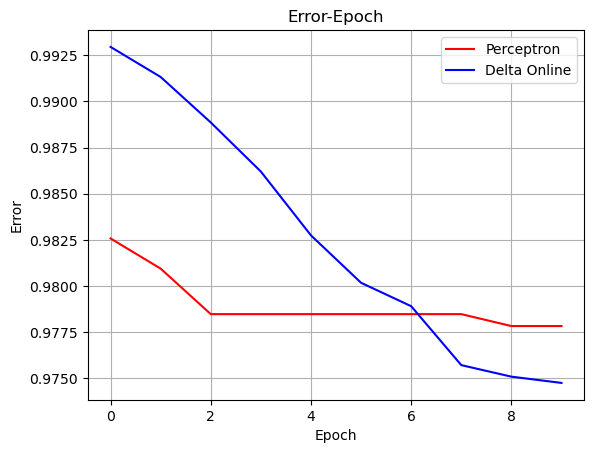

In [9]:
#parameters
epoch = 10
learning_rate = 0.001

weights1, mse_perceptron_list = perceptron_model(data, labels, epoch, learning_rate)
weights2, mse_delta_online_list = delta_model_online(data, labels, epoch, learning_rate)



plt.plot(range(epoch), mse_perceptron_list, label='Perceptron', c="r")
plt.plot(range(epoch), mse_delta_online_list, label='Delta Online', c="b")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error-Epoch')
plt.legend()
plt.grid(True)
plt.show()
